<a href="https://colab.research.google.com/github/shahzadahmad3/Natural-Language-Processing/blob/main/Sequence_model_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1️⃣ **Understanding Word Order in NLP**

Traditional models like BoW, TF-IDF, and Word2Vec do not consider the order of words. However, in many NLP tasks, word order matters!

✅ **Example:**

*  "The cat chased the mouse."
*  "The mouse chased the cat."

💡 BoW/TF-IDF will treat both sentences similarly, but their meanings are opposite!

**Recurrent Neural Networks (RNNs)** is a neural network designed for sequential data. Unlike traditional networks, RNNs:
*  Process data sequentially.
*  Use previous outputs as inputs for the next step.
*  Retain memory of past information.

**How RNN Works – The Concept of Memory**
*Basic RNN Structure*

An RNN processes a sequence one word at a time, maintaining a hidden state that carries information forward.

✅ Example Sentence: "The cat is sleeping."
1.  "The" → Creates hidden state 1.
2.  "cat" → Uses hidden state 1 to compute hidden state 2.
3.  "is" → Uses hidden state 2 to compute hidden state 3.
4.  "sleeping" → Uses hidden state 3 to compute final prediction.

**RNN Mathematics (How It Works Internally)**

At each time step t, an RNN performs these operations:

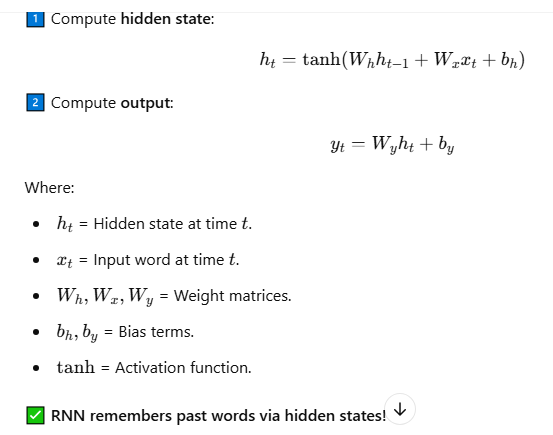

In [3]:
#Step 1: Install Required Libraries
!pip install torch

In [4]:
#Step 2: Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [21]:
#Step 3: Define an RNN Model
class SimpleRNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(SimpleRNN, self).__init__()
    self.input_size=input_size
    self.hidden_size=hidden_size
    self.output_size=output_size

    self.rnn=nn.RNN(input_size, hidden_size, batch_first=True)
    self.fc=nn.Linear(hidden_size, output_size)

  def forward(self, X):
    h0=torch.zeros(1, X.size(0), self.hidden_size) # Initial hidden state
    out, _=self.rnn(X, h0)
    out=self.fc(out[:, -1, :]) # Take last time-step output
    # Apply sigmoid for binary classification (optional with CrossEntropyLoss)
    #out = torch.sigmoid(out)
    return out

In [15]:
#Step 4: Create Dummy Data
X_train=np.random.randn(10, 5 , 3) # (batch_size=10, sequence_length=5, input_size=3)
y_train=np.random.randint(0, 2, (10,)) #Binary Classification
y_train

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [24]:
input_size=3
hidden_size=10
output_size=2 # Modified output size to 2

model=SimpleRNN(input_size, hidden_size, output_size)
criterian=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=0.01)

# Training Loop
for epoch in range(100):
  optimizer.zero_grad()
  outputs=model(torch.tensor(X_train, dtype=torch.float32))
  loss=criterian(outputs, torch.tensor(y_train, dtype=torch.long))
  loss.backward()
  optimizer.step()

  if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.4714
Epoch [20/100], Loss: 0.1674
Epoch [30/100], Loss: 0.0187
Epoch [40/100], Loss: 0.0044
Epoch [50/100], Loss: 0.0023
Epoch [60/100], Loss: 0.0016
Epoch [70/100], Loss: 0.0013
Epoch [80/100], Loss: 0.0011
Epoch [90/100], Loss: 0.0010
Epoch [100/100], Loss: 0.0009


 **RNNs struggle with long-term dependencies** due to a problem called the Vanishing Gradient Problem.

✅ **What is the Vanishing Gradient Problem?**

When training an RNN using backpropagation, the gradients (used to update weights) get smaller as they move backward through time. This means:

*  The model forgets early words in a long sequence.
*  Important context from earlier words is lost.

💡 **Example:**

*  Sentence: "The professor who was born in 1980 and later became a scientist wrote a book."
*  Basic RNN struggles to link "professor" with "wrote a book", because too many words are in between!

**✅ Solution: Use LSTMs or GRUs!**
LSTMs and GRUs have special gates that help retain long-term dependencies.